# Library Analysis

This notebook provides interesting info about the user's GoodReads library

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse

plt.style.use('fivethirtyeight')

In [56]:
df = pd.read_csv("books.csv")

# Data Cleaning
df['title'] = df['title'].str.lstrip()
df['num ratings'] = df['num ratings'].str.lstrip()
df['num ratings'] = df['num ratings'].str.replace(',', '', regex=True)
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df.loc[df['num pages'] == "unknown", "num pages"] = 0
df["num pages"] = df["num pages"].astype(float)
df.rename(columns={'num pages': 'num_pages'}, inplace=True, errors='raise')
df["rating_numeric"] = df["rating"]
df.loc[df['rating_numeric'] == "Not Rated", "rating_numeric"] = 0
df["rating_numeric"] = df["rating_numeric"].astype(float)
df["avg rating"] = df["avg rating"].astype(float)
df["num ratings"] = df["num ratings"].astype(float)
df['date pub'] = pd.to_datetime(df['date pub'], errors='coerce')
df['date read'] = pd.to_datetime(df['date read'], errors='coerce')

# New Column
df['difference'] = df['rating_numeric'] - df['avg rating']

df.head(5)

,title,author,num_pages,avg rating,num ratings,date pub,rating,date read,rating_numeric,difference
0,Grit: The Power of Passion and Perseverance,"Duckworth, Angela*",277.0,4.08,97922.0,2016-05-03,4,2021-04-13,4.0,-0.08
1,Talking to Strangers: What We Should Know Abou...,"Gladwell, Malcolm",388.0,4.02,234724.0,2019-09-10,3,2019-03-12,3.0,-1.02
2,The Subtle Art of Not Giving a F*ck: A Counter...,"Manson, Mark*",212.0,3.91,792438.0,2016-09-13,2,NaT,2.0,-1.91
3,The Righteous Mind: Why Good People Are Divide...,"Haidt, Jonathan",419.0,4.21,46190.0,2012-03-13,5,NaT,5.0,0.79
4,"Maybe You Should Talk to Someone: A Therapist,...","Gottlieb, Lori*",415.0,4.38,223425.0,2019-04-02,3,NaT,3.0,-1.38


In [57]:
# Number of books read/rated/dates entered
# Number of pages read

books_read = len(df.index)
no_date_entered = sum(df['date read'].isna())
with_date = books_read - no_date_entered
no_rating = sum(df['rating'] == 'Not Rated')
with_rating = books_read - no_rating
total_pages = df['num_pages'].sum()
average_pages = total_pages / books_read

print(
f"The number of books read is {books_read}"
f"\nOut of {books_read} books, {with_rating} have been rated and {no_rating} have not."
f"\nOut of {books_read} books, for {with_date} the reading date has been entered and for {no_date_entered} it has not."
f"\nThe total number of pages read is {total_pages}"
f"\nThe average number of pages per book is {average_pages}")

The numer of books read is 32
Out of 32 books, 32 have been rated and 0 have not.
Out of 32 books, for 5, the reading date has been entered and for 27 it has not.
The total number of pages read is 10988.0
The average number of pages per book is 343.375


In [58]:
# Favorite books (5-stars)
top_books = df[df['rating_numeric'] == 5]
top_books

,title,author,num_pages,avg rating,num ratings,date pub,rating,date read,rating_numeric,difference
3,The Righteous Mind: Why Good People Are Divide...,"Haidt, Jonathan",419.0,4.21,46190.0,2012-03-13,5,NaT,5.0,0.79
6,Man's Search for Meaning,"Frankl, Viktor E.",165.0,4.36,548624.0,1946-01-01,5,NaT,5.0,0.64
7,Blink: The Power of Thinking Without Thinking,"Gladwell, Malcolm",296.0,3.95,547272.0,2005-01-11,5,NaT,5.0,1.05
8,Fooled by Randomness: The Hidden Role of Chanc...,"Taleb, Nassim Nicholas*",368.0,4.08,57247.0,2001-01-01,5,NaT,5.0,0.92
9,Deep Work: Rules for Focused Success in a Dist...,"Newport, Cal",296.0,4.19,116079.0,2016-01-05,5,NaT,5.0,0.81
11,The Everything Store: Jeff Bezos and the Age o...,"Stone, Brad*",384.0,4.13,67366.0,2013-10-15,5,NaT,5.0,0.87
12,Factfulness: Ten Reasons We're Wrong About the...,"Rosling, Hans",342.0,4.36,154790.0,2018-04-03,5,NaT,5.0,0.64
14,The Intelligent Investor,"Graham, Benjamin",623.0,4.24,108183.0,1949-01-01,5,NaT,5.0,0.76
15,Getting Things Done: The Art of Stress-Free Pr...,"Allen, David",267.0,4.00,145887.0,2001-01-01,5,NaT,5.0,1.00
16,"Lean In: Women, Work, and the Will to Lead","Sandberg, Sheryl",217.0,3.95,245770.0,2013-07-07,5,NaT,5.0,1.05


In [59]:
# Top 5 oldest books
df.sort_values(by=['date pub']).head(5)

,title,author,num_pages,avg rating,num ratings,date pub,rating,date read,rating_numeric,difference
30,How to Win Friends and Influence People,"Carnegie, Dale",288.0,4.21,800236.0,1936-10-01,3,NaT,3.0,-1.21
6,Man's Search for Meaning,"Frankl, Viktor E.",165.0,4.36,548624.0,1946-01-01,5,NaT,5.0,0.64
14,The Intelligent Investor,"Graham, Benjamin",623.0,4.24,108183.0,1949-01-01,5,NaT,5.0,0.76
18,Influence: The Psychology of Persuasion,"Cialdini, Robert B.*",320.0,4.20,129294.0,1984-01-01,3,2007-03-20,3.0,-1.20
24,The E-Myth Revisited: Why Most Small Businesse...,"Gerber, Michael E.",269.0,4.04,74941.0,1985-09-01,5,NaT,5.0,0.96


In [60]:
# Top 5 newest books
df.sort_values(by=['date pub'], ascending=False).head(5)

,title,author,num_pages,avg rating,num ratings,date pub,rating,date read,rating_numeric,difference
29,Freezing Order: A True Story of Money Launderi...,"Browder, Bill*",336.0,4.34,4699.0,2022-04-12,3,NaT,3.0,-1.34
27,Empire of Pain: The Secret History of the Sack...,"Keefe, Patrick Radden",535.0,4.56,47881.0,2021-04-13,5,NaT,5.0,0.44
1,Talking to Strangers: What We Should Know Abou...,"Gladwell, Malcolm",388.0,4.02,234724.0,2019-09-10,3,2019-03-12,3.0,-1.02
4,"Maybe You Should Talk to Someone: A Therapist,...","Gottlieb, Lori*",415.0,4.38,223425.0,2019-04-02,3,NaT,3.0,-1.38
26,Can't Hurt Me: Master Your Mind and Defy the Odds,"Goggins, David*",366.0,4.36,124105.0,2018-11-15,3,NaT,3.0,-1.36


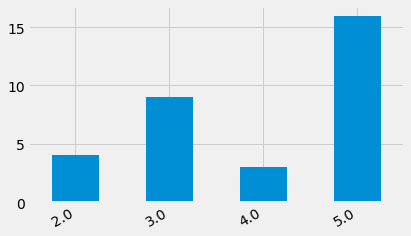

In [61]:
# Distribution rating
#df_only_rated = df.drop(df[df.rating_numeric == 0].index)
#df_only_rated['rating_numeric'].plot(kind='hist')


rating = df_only_rated['rating_numeric']
vc = rating.value_counts().sort_index()
ax = vc.plot(kind='bar')
fig = ax.get_figure()
fig.autofmt_xdate()

<AxesSubplot:ylabel='Frequency'>

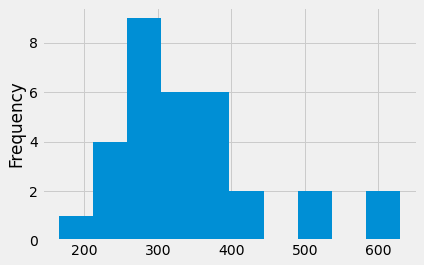

In [62]:
# Distributie number of pages
df['num_pages'].plot(kind='hist')

In [63]:
# Favourite writers
writers = df.groupby(['author'])['author'].count()
favourite_writers = writers.sort_values(ascending=False)
favourite_writers.head(5)

author
Gladwell, Malcolm          3
Allen, David               1
Heath, Chip                1
Taleb, Nassim Nicholas*    1
Stone, Brad*               1
Name: author, dtype: int64

In [64]:
# Favourite writers - avg. rating
rating_writers = df.groupby(['author']).rating.mean()
bestrated_writers = rating_writers.sort_values(ascending=False)
bestrated_writers.head(5)

author
Allen, David               5.0
Gerber, Michael E.         5.0
Taleb, Nassim Nicholas*    5.0
Stone, Brad*               5.0
Sinek, Simon*              5.0
Name: rating, dtype: float64

In [65]:
# Favourite writers - avg. number of pages
pages_writers = df.groupby(['author']).num_pages.mean()
longest_writers = pages_writers.sort_values(ascending=False)
longest_writers.head(5)

author
Isaacson, Walter*        630.0
Graham, Benjamin         623.0
Keefe, Patrick Radden    535.0
Kahneman, Daniel         499.0
Haidt, Jonathan          419.0
Name: num_pages, dtype: float64

### Comparison with general public

In [66]:
# Books about which you are more positive
df.sort_values(by='difference', ascending=False).head(5)

,title,author,num_pages,avg rating,num ratings,date pub,rating,date read,rating_numeric,difference
16,"Lean In: Women, Work, and the Will to Lead","Sandberg, Sheryl",217.0,3.95,245770.0,2013-07-07,5,NaT,5.0,1.05
7,Blink: The Power of Thinking Without Thinking,"Gladwell, Malcolm",296.0,3.95,547272.0,2005-01-11,5,NaT,5.0,1.05
15,Getting Things Done: The Art of Stress-Free Pr...,"Allen, David",267.0,4.00,145887.0,2001-01-01,5,NaT,5.0,1.00
24,The E-Myth Revisited: Why Most Small Businesse...,"Gerber, Michael E.",269.0,4.04,74941.0,1985-09-01,5,NaT,5.0,0.96
8,Fooled by Randomness: The Hidden Role of Chanc...,"Taleb, Nassim Nicholas*",368.0,4.08,57247.0,2001-01-01,5,NaT,5.0,0.92


In [67]:
# Books about which you are more negative

df = df.drop(df[df.rating_numeric == 0].index)
df.sort_values(by='difference').head(5)

,title,author,num_pages,avg rating,num ratings,date pub,rating,date read,rating_numeric,difference
17,Steve Jobs,"Isaacson, Walter*",630.0,4.15,1119882.0,2011-10-01,2,2019-03-03,2.0,-2.15
19,The Five Dysfunctions of a Team: A Leadership ...,"Lencioni, Patrick*",227.0,4.08,97640.0,2002-04-11,2,NaT,2.0,-2.08
23,Freakonomics: A Rogue Economist Explores the H...,"Levitt, Steven D.",268.0,4.00,792067.0,2005-04-12,2,NaT,2.0,-2.00
2,The Subtle Art of Not Giving a F*ck: A Counter...,"Manson, Mark*",212.0,3.91,792438.0,2016-09-13,2,NaT,2.0,-1.91
4,"Maybe You Should Talk to Someone: A Therapist,...","Gottlieb, Lori*",415.0,4.38,223425.0,2019-04-02,3,NaT,3.0,-1.38


In [68]:
# Mean difference between my ratings and those of other readers
mean_difference = df['difference'].apply(abs).mean()

mean_difference

1.01

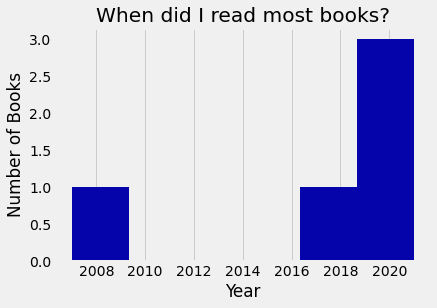

In [69]:
# Distribution of when you read the books (By year)

year_read = df['date read'].dt.year

n, bins, patches = plt.hist(x=year_read, bins='auto', color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Year')
plt.ylabel('Number of Books')
plt.title('When did I read most books?')
maxfreq = n.max()

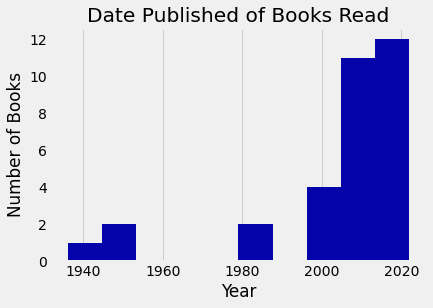

In [70]:
# Distribution of when the books were published (by year)
year_pub = df['date pub'].dt.year

n, bins, patches = plt.hist(x=year_pub, bins='auto', color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Year')
plt.ylabel('Number of Books')
plt.title('Date Published of Books Read')
maxfreq = n.max()